In [36]:
what_were_learning = '''1. Getting data ready
                        2. Choosing a machine learning model
                        3. Fitting a model to the data and making predictions
                        4. Evaluating model predictions
                        5. Improving model predictions
                        6. Saving & Loading models'''

In [3]:
#necessary imports 
import pandas as pd
import numpy as np

This is a continuation of 'scikit-learn.ipynb' as that notebook was getting too lengthy.
Taking through step 5 - Improving the model predictions

#### 5. Improving the model predictions

first predictions are often referred to as baseline predictions
first model = baseline model

How to improve a model?
From a data perspective : 
- Could we collect more data ?
- Could we improve our data ?

From a model perspective :
- Is there a better model we could use ?
- Could we improve the current model ? (tunning hyperparameters)

Parameters v/s Hyperparameters:
- Parameters = model find these patterns in data
- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters :
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

#### 5.1 Tuning hyperparameters by hand
<img src = '/home/hp/Documents/College/Coding/Machine Learning/zero_to_mastery_course/Scikit-Learn Library/images/hyperparameters-by-hand.png'/>

<b>Let's make 3 sets : training, validation, test</b>

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [5]:
heart_disease = pd.read_csv("/home/hp/Documents/College/Coding/Machine Learning/zero_to_mastery_course/csv/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust : 
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def evaluate(y_true, y_preds):
    Accuracy = accuracy_score(y_true,y_preds)
    Recall = recall_score(y_true,y_preds)
    Precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metrics_dictonary = {"Accuracy" : round(Accuracy,2),
                         "Precision" : round(Precision, 2),
                         "Recall" : round(Recall,2),
                         "f1" : round(f1, 2)}

    return metrics_dictonary



In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled))      #70% of the data
valid_split = round(train_split + 0.15* len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [9]:
clf.fit(X_train,y_train)
#evaluating on validation set so we can tune the parameters

y_preds = clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics

{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1': 0.85}

In [29]:
#create a second classifier with different parameters
clf2 = RandomForestClassifier(n_estimators=20, max_depth=200)

clf2.fit(X_train,y_train)

y_preds2 = clf2.predict(X_valid)

#evaluate the classifier on validation set
clf2_metrics = evaluate(y_valid, y_preds2)
clf2_metrics

{'Accuracy': 0.89, 'Precision': 0.92, 'Recall': 0.88, 'f1': 0.9}

#### 5.2 Tunning Hyperparameters randomly using RandomizedSearchCV

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
#create a dictonary of all the hyperparameters you'd like to adjust
grid = {"n_estimators" : [100,200,300,500],
        "max_depth" : [None, 5,10,20,30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,4]}

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2)

clf = RandomForestClassifier(n_jobs= 1)         #n_jobs dictate how much of the computer's processor do you wanna dedicate to the program

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)                #verbose gives a log of the output

#fit the randomizedsearchcv version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_f

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, m

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.8s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.8s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=2)

In [12]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [13]:
#now make predictions with the best parameters
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate(y_test, rs_y_preds)
rs_metrics

#we didnt really see improvement here. that's where the experimentation comes in

{'Accuracy': 0.79, 'Precision': 0.75, 'Recall': 0.83, 'f1': 0.79}

#### 5.3 Hyperparameter tuning with GridSearchCV

In [14]:
grid

{'n_estimators': [100, 200, 300, 500],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

The main difference between RandomizedSearchCV and GridSearchCV is that GridSearchCV is a bruteforce way and goes through every combination of the hyperparameters to find the best group of parameters. So training one model can take a lot of time. So let's create a new dictonary with reduced number of hyperparameters GridSearchCV has to go through (called 'grid_2')

In [16]:
#manipulate according to the best parameters
grid_2 = {'n_estimators': [100, 200, 300],
            'max_depth': [None],
            'max_features': [ 'sqrt'],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [1, 2, 4]}

In [23]:
from sklearn.model_selection import GridSearchCV

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2)

clf = RandomForestClassifier(n_jobs= 1)         #n_jobs dictate how much of the computer's processor do you wanna dedicate to the program

gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, verbose=2,cv=5)                #verbose gives a log of the output

#fit the randomizedsearchcv version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1,

/home/hp/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hp/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/hp/.local/lib/python3.10/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/hp/.local/lib/python3.10/site-

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [24]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [25]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate(y_test, gs_y_preds)
gs_metrics

{'Accuracy': 0.82, 'Precision': 0.89, 'Recall': 0.75, 'f1': 0.81}

Let's compare our different models metrics


In [31]:
compare_metrics = pd.DataFrame({"Baseline" : baseline_metrics,
                                "By Hand" : clf2_metrics,
                                "Random Search" : rs_metrics,
                                "Grid Search" : gs_metrics})

compare_metrics

,baseline,By hand,Random Search,Grid Search
Accuracy,0.82,0.89,0.79,0.82
Precision,0.81,0.92,0.75,0.89
Recall,0.88,0.88,0.83,0.75
f1,0.85,0.90,0.79,0.81


<AxesSubplot:>

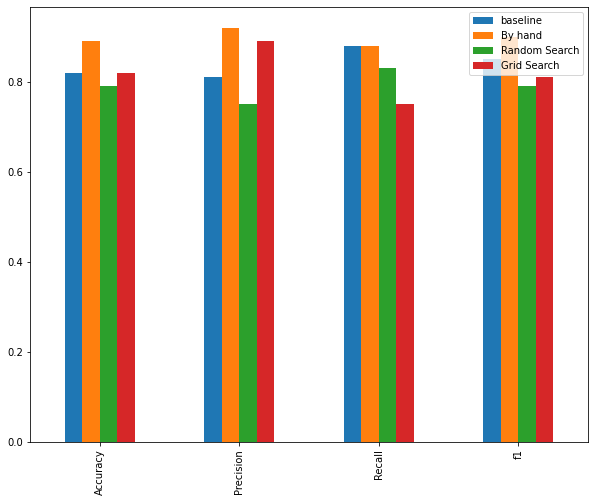

In [32]:
compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving & Loading Models

Two ways to do this - <br>
    1. Python's `pickle` model <br>
    2. `joblib`'s model <br>

In [40]:
import pickle

#saving an existing model
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl", "wb"))

In [44]:
#load saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [45]:
#making some predictions
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2)
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate(pickle_y_preds, y_test)

{'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'f1': 0.97}

### Using Joblib

In [46]:
from joblib import dump, load

#save model to file
dump(gs_clf, filename="gs_random_forest_model-1.joblib")

['gs_random_forest_model-1.joblib']

In [47]:
loaded_joblib_model = load(filename="gs_random_forest_model-1.joblib")

In [48]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate(joblib_y_preds, y_test)

{'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'f1': 0.97}